# Text Classification using Naive Bayes classifiers

Naive Bayes classification is a probabilistic approach for classification. It is based on Bayes Theorem. Naive Bayes classification uses any of the probability distributions, Gaussian distribution, Multinomial Distribution, Bernoulli distribution.


## 1. Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## 2. Prepare the Dataset

Import the dataset from https://www.kaggle.com/uciml/sms-spam-collection-dataset.

In [2]:
# Convert the data into Python dataframe.

dataset = pd.read_csv("C:\Seetha\data\spam.csv", encoding = "ISO-8859-1")

# extract only columns v1 and v2
dataset = dataset[["v1","v2"]]

# replace the words ham with 0 and spam with 1. 
dataset = dataset.replace({'ham':0, 'spam':1})

print(dataset.shape)

# display the first 5 rows for the dataset.
dataset.head()


(5572, 2)


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Split the data into training and testing set.

In [3]:
x = dataset["v2"]
y = dataset["v1"]

x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.20, stratify=y, random_state = 17)

print('X train size = ' , x_train.shape)
print('Y train size = ' , y_train.shape)
print('X test size = ' , x_test.shape)
print('Y test size = ' , y_test.shape)

X train size =  (4457,)
Y train size =  (4457,)
X test size =  (1115,)
Y test size =  (1115,)


In [4]:
# Apply TF-IDF to obtain the corpus

vectorizer = TfidfVectorizer(min_df=5, max_df = 0.8, sublinear_tf=True, use_idf =True, stop_words = 'english')

train_corpus_tf_idf = vectorizer.fit_transform(x_train)

test_corpus_tf_idf = vectorizer.transform(x_test)


print('X train corpus size = ' , train_corpus_tf_idf.shape)
print('X test corpus size = ' , test_corpus_tf_idf.shape)

X train corpus size =  (4457, 1361)
X test corpus size =  (1115, 1361)


## 3. Build the classifier  

In [5]:
from sklearn.naive_bayes import GaussianNB

# create an object of the GaussianNB classifier
GaussNB = GaussianNB()

# train the classifier
GaussNB.fit(train_corpus_tf_idf.toarray(),y_train)

print(GaussNB)

GaussianNB(priors=None, var_smoothing=1e-09)


In [6]:
from sklearn.naive_bayes import BernoulliNB

# create an object of the GaussianNB classifier
BernNB = BernoulliNB(binarize=True)

# train the classifier
BernNB.fit(train_corpus_tf_idf.toarray(),y_train)
print(BernNB)


BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)


In [7]:
from sklearn.naive_bayes import MultinomialNB

MultiNB = MultinomialNB()

# train the classifier
MultiNB.fit(train_corpus_tf_idf.toarray(),y_train)
print(MultiNB)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


## 4. Make predictions for new Data

In [8]:
y_predict_bnb = BernNB.predict(test_corpus_tf_idf.toarray())

y_predict_gnb = GaussNB.predict(test_corpus_tf_idf.toarray())

y_predict_mnb = MultiNB.predict(test_corpus_tf_idf.toarray())

## 5. Performance Measures

In [9]:
# display the accuracy

from sklearn.metrics import accuracy_score

print('BernoulliNB', accuracy_score(y_test, y_predict_bnb)*100)

print('GaussianNB', accuracy_score(y_test, y_predict_gnb)*100)

print('MultinomialNB', accuracy_score(y_test, y_predict_mnb)*100)

BernoulliNB 86.63677130044843
GaussianNB 81.0762331838565
MultinomialNB 97.66816143497758


## 6. Visualize the word cloud

In [10]:
from wordcloud import WordCloud, STOPWORDS

def generate_word_cloud(text):
    stopwords = STOPWORDS
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)    
    #storing the wordcloud in image "wc.png"
    wordcloud.to_file('wc.png')
    return 'wc.png'

HAM Class


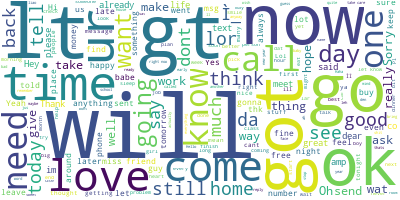

In [11]:
# Generating HAM class wordcloud from data

generate_word_cloud("".join(dataset.loc[dataset['v1'] == 0]["v2"].tolist()))
print('HAM Class')
Image("wc.png")

SPAM class


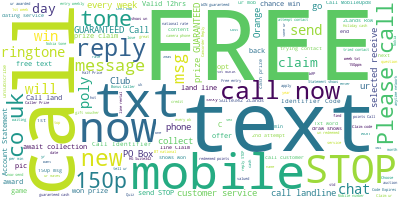

In [12]:
# Generating SPAM class wordcloud from data

generate_word_cloud("".join(dataset.loc[dataset['v1'] == 1]["v2"].tolist()))
print('SPAM class')
Image("wc.png")